<a href="https://colab.research.google.com/github/sirfara12/PCVK25_3G_26/blob/main/week5_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## D. PERCOBAAN PRAKTIKUM
### D-1 PERCOBAAN HISTOGRAM


In [ ]:
from  google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


<BarContainer object of 256 artists>

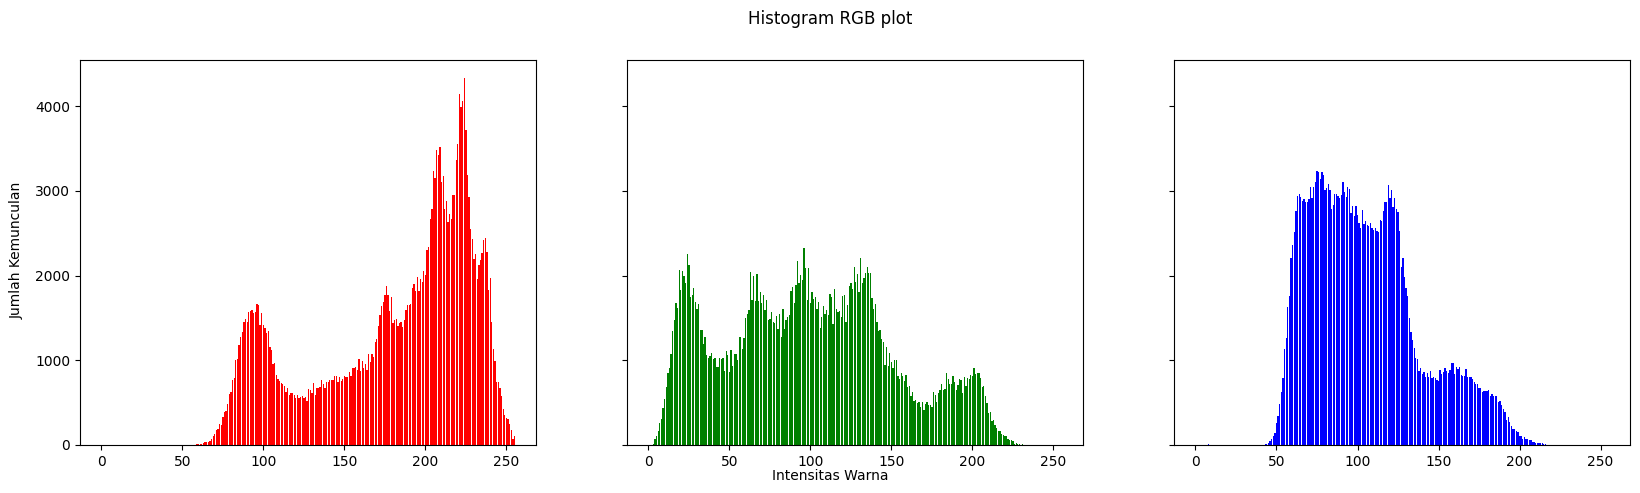

In [ ]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


### PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

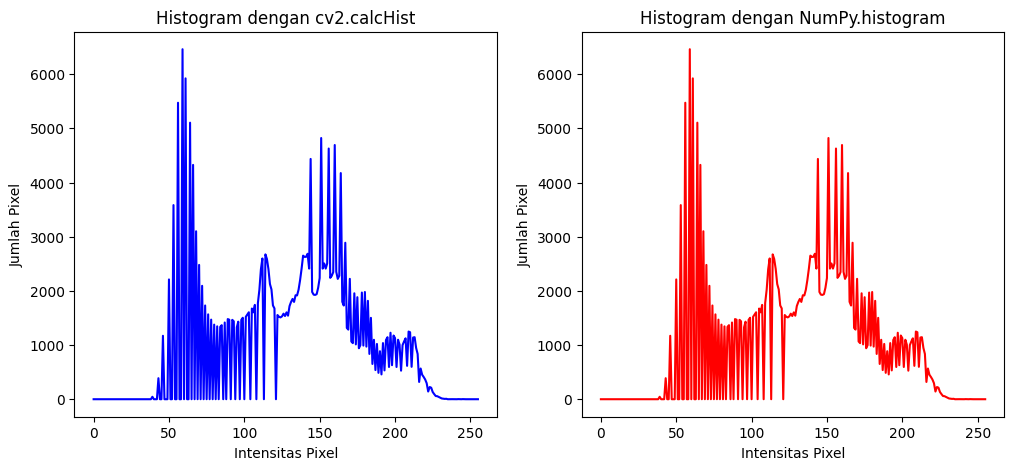

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png", cv2.IMREAD_GRAYSCALE)
# Histogram dengan OpenCV (cv2.calcHist)
hist_cv2 = cv2.calcHist([img], [0], None, [256], [0, 256])

# Histogram dengan NumPy
hist_np, bins = np.histogram(img.ravel(), bins=256, range=[0,256])

# Plot perbandingan
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist_cv2, color='blue')
plt.title("Histogram dengan cv2.calcHist")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")

plt.subplot(1,2,2)
plt.plot(hist_np, color='red')
plt.title("Histogram dengan NumPy.histogram")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")

plt.show()


Jawaban: Ya, output dari cv2.calcHist() dan numpy.histogram() sama, hanya beda bentuk array (float32 vs int64). Grafiknya identik.

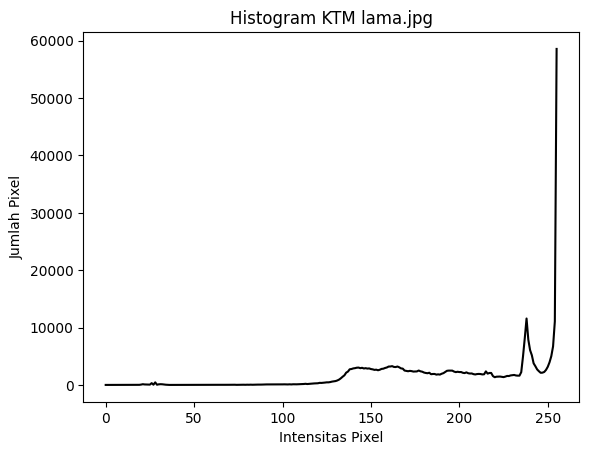

In [4]:
# 2
img_ktm = cv2.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/KTM lama.jpg", cv2.IMREAD_GRAYSCALE)

# Histogram numpy
hist_ktm, bins = np.histogram(img_ktm.ravel(), bins=256, range=[0,256])

plt.plot(hist_ktm, color='black')
plt.title("Histogram KTM lama.jpg")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")
plt.show()


Jawaban: Jika histogram menumpuk di kiri maka gambar cenderung gelap, bila di kanan gambar cenderung terang, sedangkan jika hanya di tengah tanpa sebaran luas maka gambar memiliki kontras rendah atau terlihat pucat.

### D2 PERCOBAAN HISTOGRAM EQUALIZATION

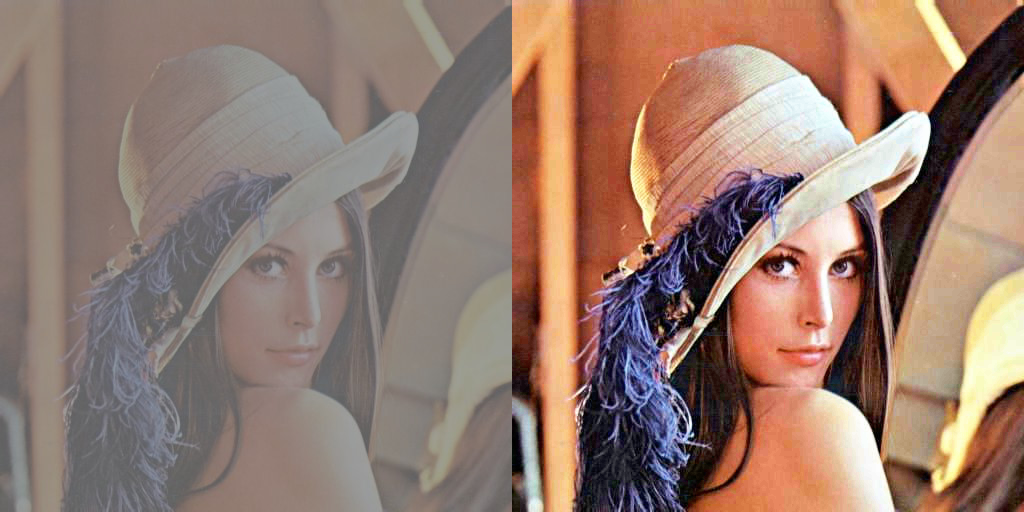

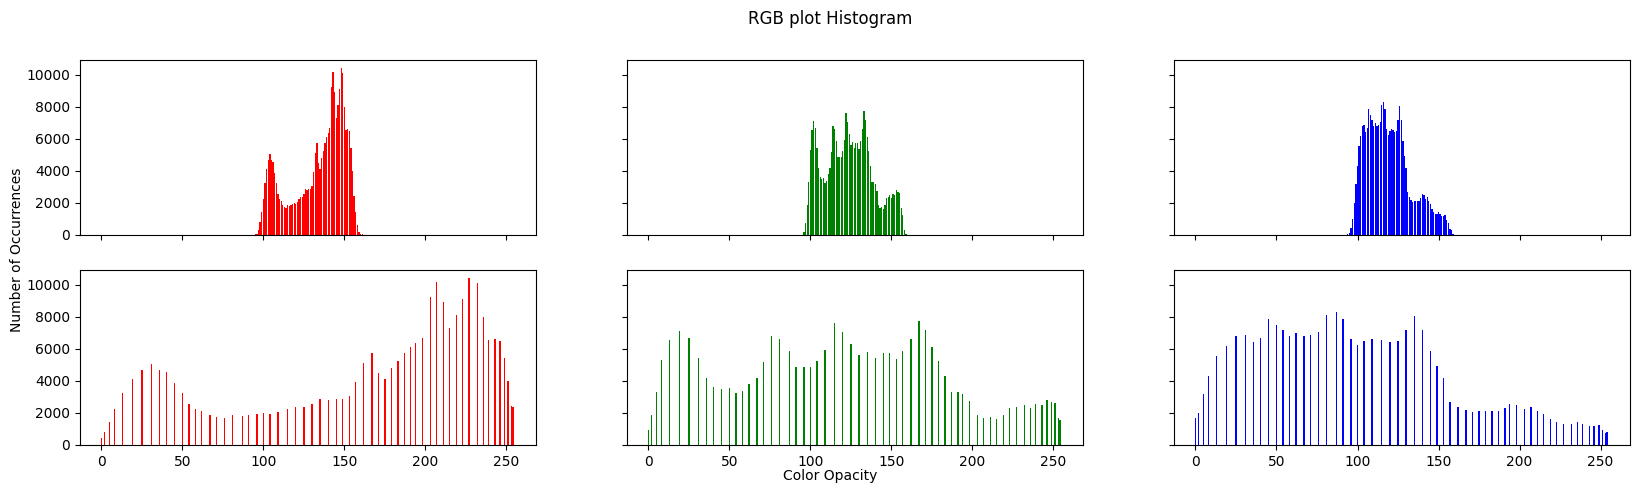

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#LANGKAH 1: Histogram kumulatif yang dinormalisasi
#ratakan array gambar dan hitung histogram melalui binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#LANGKAH 2: Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#LANGKAH 3: Transformasi
# ratakan array gambar menjadi 10 daftar
img_list = list(img_array.flatten())

# mengubah nilai piksel menjadi sama
eq_img_list = [transform_map[p] for p in img_list]

# membentuk ulang dan menulis kembali ke img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))  # concatenate image
cv2_imshow(final_frame)


names = np.arange (256)
isgrayimg = (len(img.shape) == 2) or (img.shape[2] == 1)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot Histogram')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('RGB plot Histogram')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

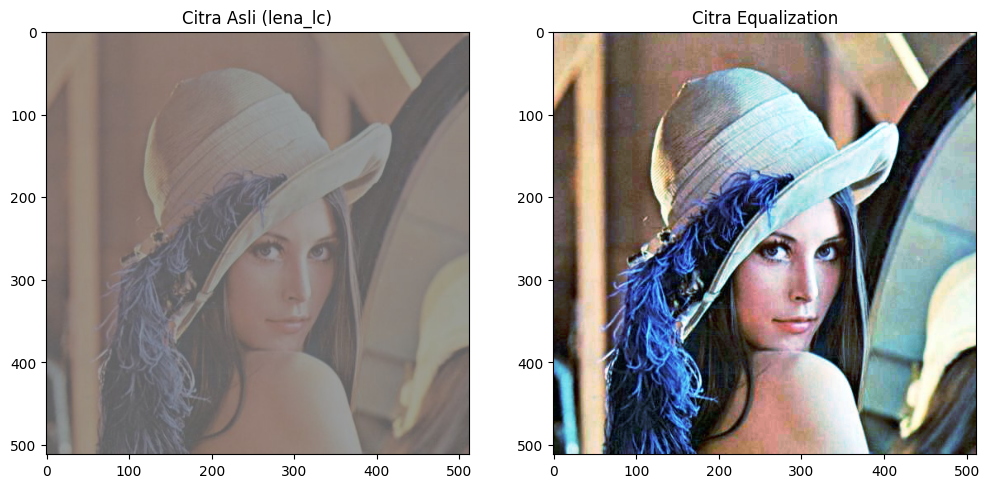

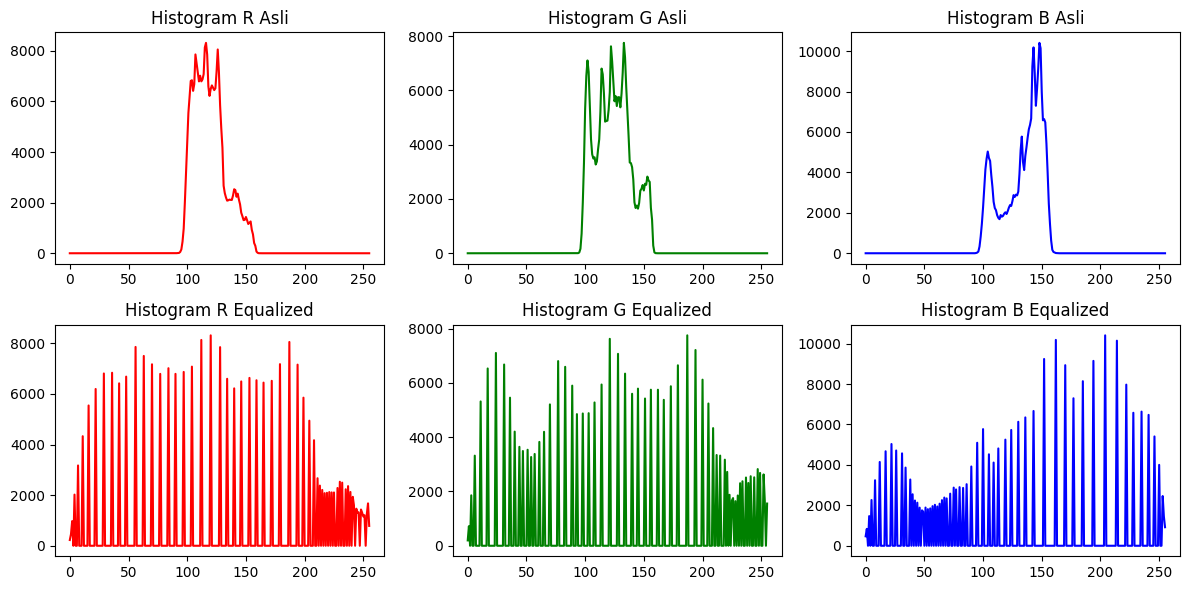

In [7]:
# 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/lena_lc.jpg")

# Pisahkan channel BGR
b, g, r = cv2.split(img)

# Equalization tiap channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Gabungkan lagi jadi citra berwarna
img_eq = cv2.merge((eq_b, eq_g, eq_r))

# Plot citra sebelum dan sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Citra Asli (lena_lc)")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
plt.title("Citra Equalization")
plt.show()

# Plot histogram sebelum dan sesudah
colors = ('r','g','b')
plt.figure(figsize=(12,6))

for i,col in enumerate(colors):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,3,i+1)
    plt.plot(hist,color=col)
    plt.title(f"Histogram {col.upper()} Asli")

for i,col in enumerate(colors):
    hist = cv2.calcHist([img_eq],[i],None,[256],[0,256])
    plt.subplot(2,3,i+4)
    plt.plot(hist,color=col)
    plt.title(f"Histogram {col.upper()} Equalized")

plt.tight_layout()
plt.show()


### PERTANYAAN PRAKTIKUM D2
1. Perbandingan Citra Lena <br>
    a. Gunakan hasil histogram equalization pada citra lena.jpg. <br>
    b. Hitung nilai PSNR antara citra asli dan citra hasil equalization. <br>
    c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?
<br> Jawaban 1.c <br>

Berdasarkan hasil perhitungan, nilai PSNR antara citra asli dan citra hasil histogram equalization berada pada kisaran yang relatif rendah. Hal ini disebabkan karena proses equalization mengubah distribusi intensitas piksel secara signifikan sehingga menghasilkan perbedaan numerik yang cukup besar terhadap citra asli. Meskipun demikian, nilai PSNR yang rendah tidak selalu menunjukkan bahwa kualitas visual citra menurun. Secara visual, histogram equalization justru meningkatkan kualitas tampilan citra dengan cara meratakan distribusi intensitas.

/tmp/ipython-input-2006589904.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0,256], color='black')
/tmp/ipython-input-2006589904.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0,256], color='black')


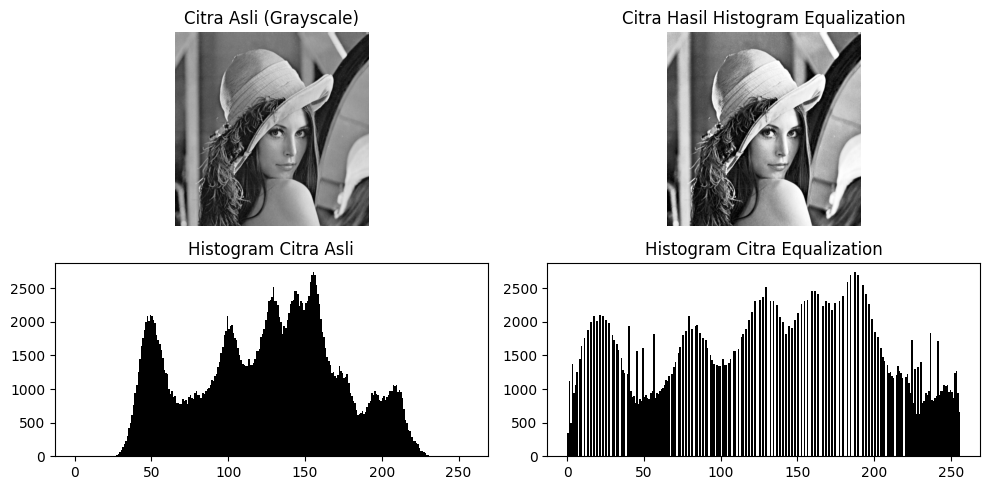

In [14]:
# 1 a
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Histogram Equalization (grayscale)
img_eq = cv2.equalizeHist(img_gray)

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Citra Asli (Grayscale)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Citra Hasil Histogram Equalization")
plt.axis("off")

# --- Histogram ---
plt.subplot(2,2,3)
plt.hist(img_gray.ravel(), 256, [0,256], color='black')
plt.title("Histogram Citra Asli")

plt.subplot(2,2,4)
plt.hist(img_eq.ravel(), 256, [0,256], color='black')
plt.title("Histogram Citra Equalization")

plt.tight_layout()
plt.show()


In [15]:
# 1b
import cv2
import numpy as np

# Baca gambar Lena grayscale
img_bgr = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Lenna.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Histogram Equalization
img_eq = cv2.equalizeHist(img_gray)

# Fungsi PSNR
def psnr(original, processed):
    mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

psnr_value = psnr(img_gray, img_eq)
print("PSNR antara citra asli dan hasil equalization:", psnr_value, "dB")


PSNR antara citra asli dan hasil equalization: 19.456693191868602 dB


2. Gunakan Citra KTM Lama.jpg <br>
a. Terapkan histogram equalization pada citra KTM lama.jpg. <br>
b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout. <br>
c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

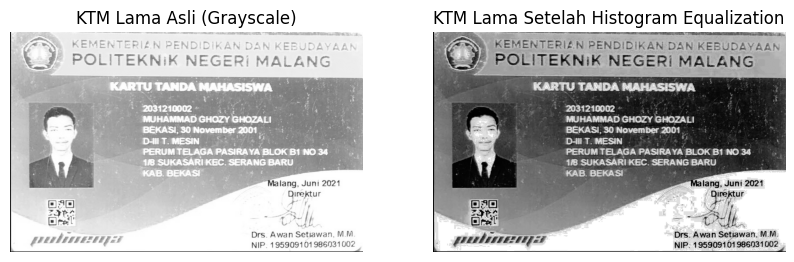

In [23]:
import cv2
import matplotlib.pyplot as plt
img_bgr = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/KTM lama.jpg')

# 2. Konversi ke grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 3. Histogram Equalization
img_eq = cv2.equalizeHist(img_gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("KTM Lama Asli (Grayscale)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("KTM Lama Setelah Histogram Equalization")
plt.axis("off")

plt.show()


/tmp/ipython-input-2276944297.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0,256], color='black')
/tmp/ipython-input-2276944297.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0,256], color='black')


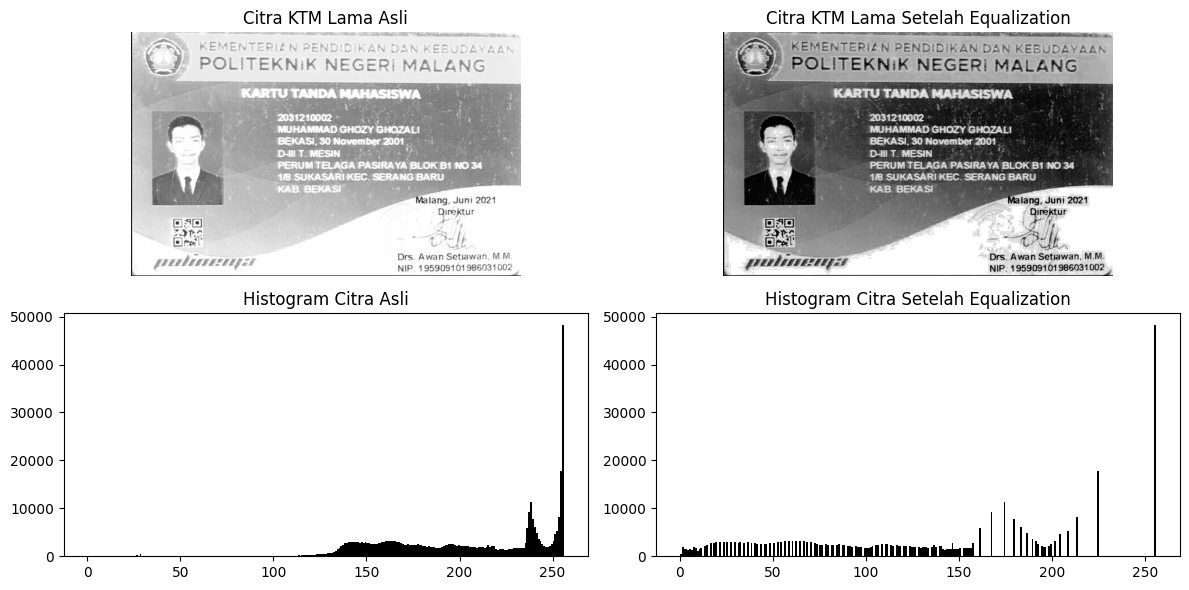

In [25]:
#2B
import cv2
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/SEMESTER 5/PCVK/KTM lama.jpg"
img_bgr = cv2.imread(path)
# Convert ke grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Histogram Equalization
img_eq = cv2.equalizeHist(img_gray)
plt.figure(figsize=(12,6))

# Citra asli
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Citra KTM Lama Asli")
plt.axis("off")

# Citra hasil equalization
plt.subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Citra KTM Lama Setelah Equalization")
plt.axis("off")

# Histogram asli
plt.subplot(2,2,3)
plt.hist(img_gray.ravel(), 256, [0,256], color='black')
plt.title("Histogram Citra Asli")

# Histogram hasil equalization
plt.subplot(2,2,4)
plt.hist(img_eq.ravel(), 256, [0,256], color='black')
plt.title("Histogram Citra Setelah Equalization")

plt.tight_layout()
plt.show()


jawaban 2C : <BR> Citra KTM Lama asli terlihat gelap dengan detail wajah, teks, dan latar belakang kurang jelas karena distribusi intensitas sempit. Setelah histogram equalization, kontras meningkat dan detail lebih mudah diamati, teks lebih terbaca, serta latar belakang lebih jelas. kontras yang tinggi membuat citra sedikit lebih “keras”. Secara keseluruhan, equalization berhasil meningkatkan kualitas informasi visual meski mengurangi sedikit kesan natural.